In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
def ideal_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * np.cos(5 * np.pi * x)

c:\Users\mbhag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPR Test Set Mean Squared Error: 0.0038
MLPR R-squared Score: 0.9641


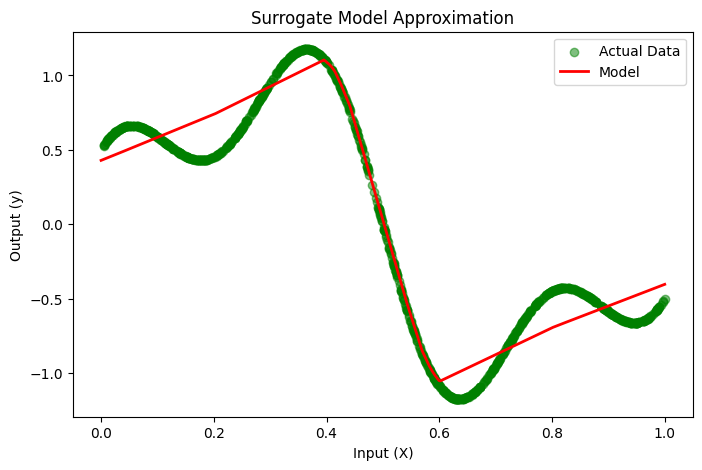

In [27]:
# Trainig data
np.random.seed(42)
X = np.random.rand(1000, 1)  # Random samples between 0 and 1
y = ideal_function(X)  # True function values


# Normailzing both features and targets
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(64, 64),  
                    activation='relu',            
                    solver='adam',                
                    learning_rate_init=0.01, 
                    learning_rate='adaptive',    
                    max_iter=1000,                
                    random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

# Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MLPR Test Set Mean Squared Error: {mse:.4f}")
print(f"MLPR R-squared Score: {r2:.4f}")


# Predict and Compare with True Function
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
X_plot_scaled = scaler_X.transform(X_plot)
y_pred_scaled = mlp.predict(X_plot_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))

# Plot Results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Actual Data", color='green', alpha=0.5)
plt.plot(X_plot, y_pred, label="Model", color='red', linewidth=2)
plt.xlabel("Input (X)")
plt.ylabel("Output (y)")
plt.legend()
plt.title("Surrogate Model Approximation")
plt.show()


In [11]:
y_pred_scaled.shape

(100,)